### imports

In [5]:
import torch
import numpy as np

import env
from utils import plot_learning_curves

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## load optimizer data

In [6]:
checkpoint = torch.load('../models/0.9089-220.ckpt', map_location={'cuda:0': 'cpu'})

## plot

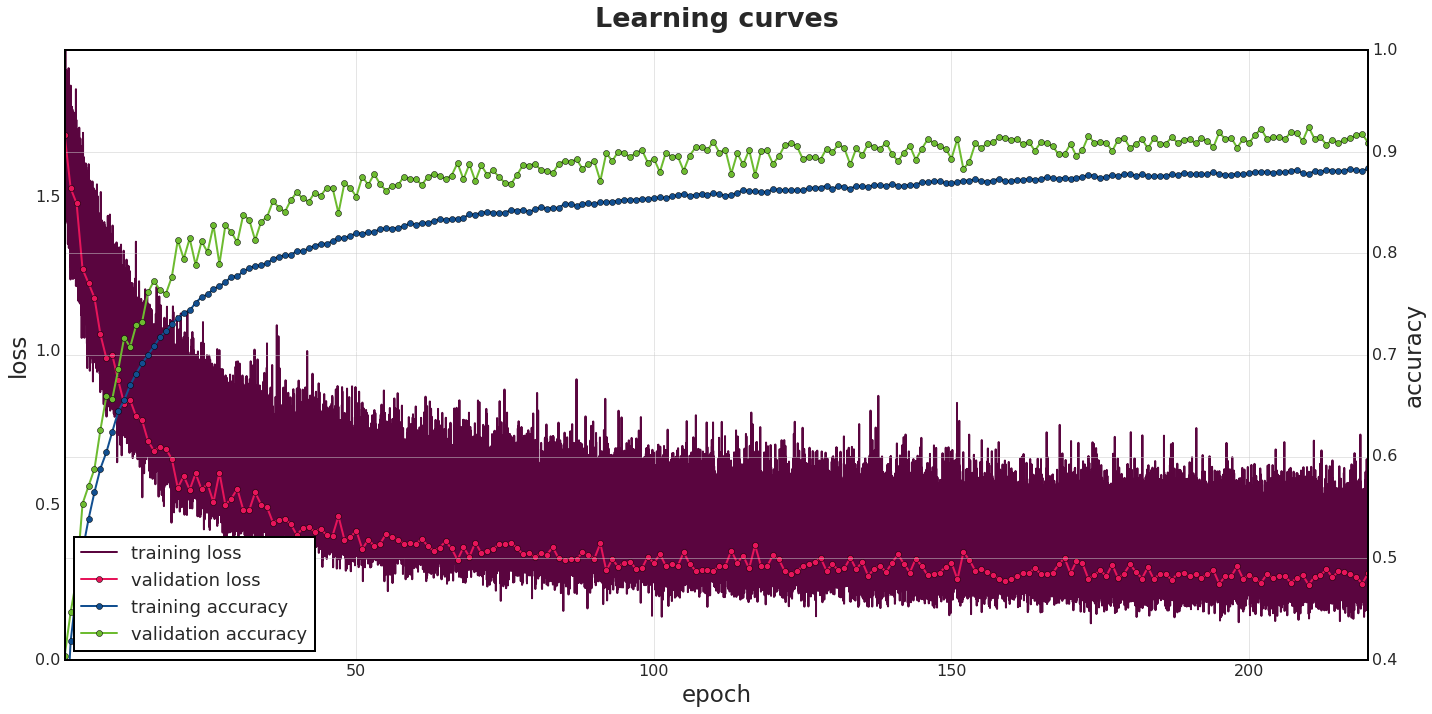

In [7]:
train_loss_history = checkpoint['train_loss']
val_loss_history = [np.mean(v) for v in checkpoint['val_loss']]
train_acc_history = checkpoint['train_acc']
val_acc_history = checkpoint['val_acc']

plot_learning_curves(train_loss_history, train_acc_history, 
                     val_loss_history, val_acc_history)